In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import gymnasium as gym
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

import racetrack
from mc import sample_episode, monte_carlo_control_eps_soft

In [16]:
env = gym.make('Racetrack-v0', track='test')


Min return: -3: 100%|██████████| 1000/1000 [00:02<00:00, 475.15it/s]


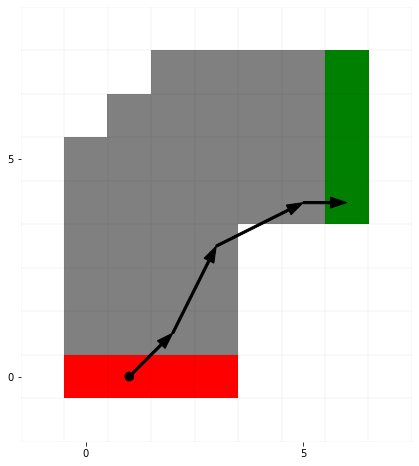

In [17]:
q, policy = monte_carlo_control_eps_soft(env, 1_000, eps=0.10, alpha=0.05)

state_ridxs, action_ridxs, returns = sample_episode(env, policy, render=True)
# sample_episode(env, policy, render=True)

In [18]:
matplotlib.rcParams['figure.figsize'] = [8, 8]

def plot_results(env, q, policy):
    v = np.max(q, axis=1).reshape(env.observation_space.nvec)
    v_pos = np.mean(v, axis=(2, 3))

    unvisited_filter = np.where(v_pos == 1.0)
    v_pos[unvisited_filter] = np.nan

    plt.figure()
    plt.title("Value Function Averaged over Speeds")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.imshow(v_pos.T, origin='lower')
    plt.colorbar()

    a_star_ridxs = np.argmax(policy, axis=1).reshape(env.observation_space.nvec)
    a_stars = np.array(np.unravel_index(a_star_ridxs, env.action_space.nvec)) - env.max_accel
    a_stars_mean = np.mean(a_stars, axis=(-1, -2))
    a_stars_norm = (a_stars_mean.T - np.mean(a_stars_mean, axis=(1, 2))).T
    a_stars_norm[:, unvisited_filter[0], unvisited_filter[1]] = 0

    env.reset()
    axis = env.render()
    xs, ys = np.arange(env.observation_space.nvec[0]), np.arange(env.observation_space.nvec[1])
    a_star_x, a_star_y = a_stars_norm[0], a_stars_norm[1]
    axis.quiver(xs, ys, a_star_x.T, a_star_y.T)

    plt.title("Action Averaged Over Speeds")
    plt.xlabel("X")
    plt.ylabel("Y")

In [19]:
env = gym.make('Racetrack-v0', track='figure05-05-right')
q, policy = monte_carlo_control_eps_soft(env, 10000, eps=0.05, alpha=0.10)

Min return: -28: 100%|██████████| 10000/10000 [01:07<00:00, 147.69it/s]


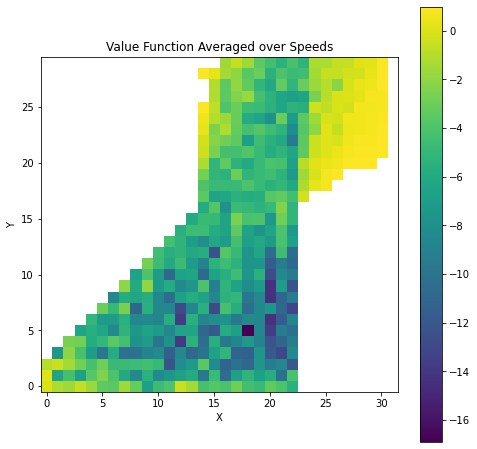

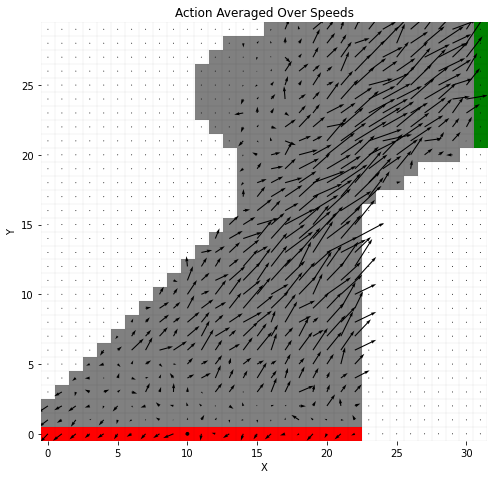

In [20]:
plot_results(env, q, policy)

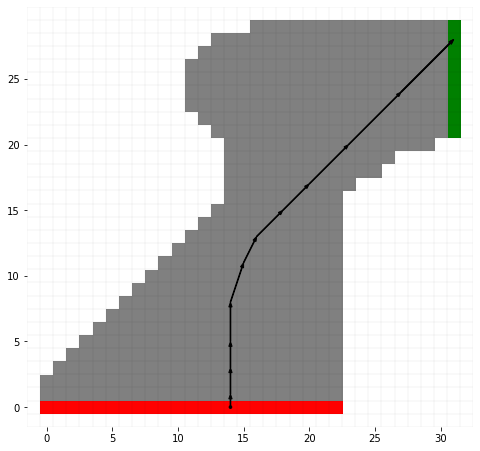

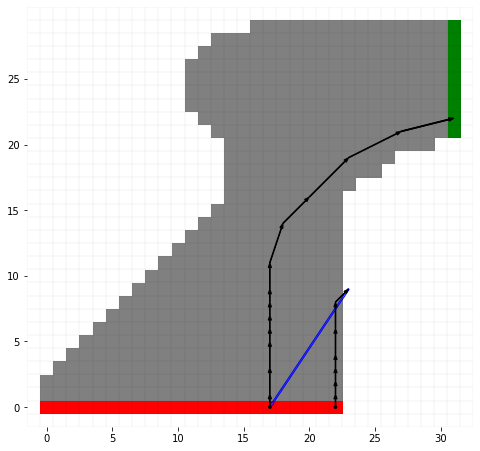

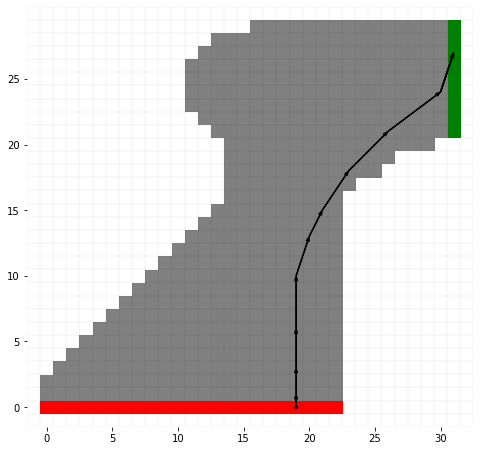

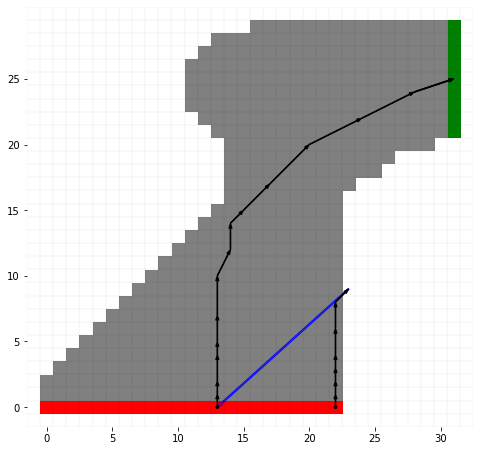

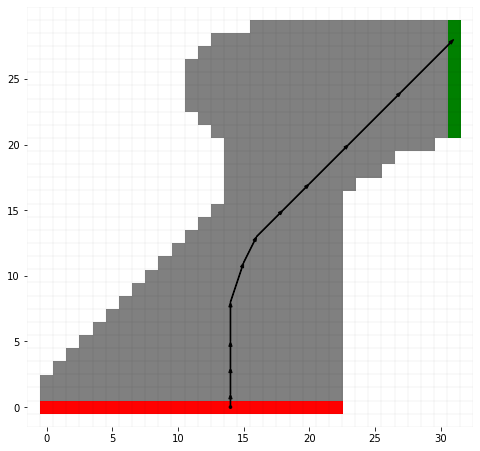

In [21]:
env0 = gym.make('Racetrack-v0', track='figure05-05-right', noisy=False)
for n in range(5):
    sample_episode(env0, policy, render=True)

In [ ]:
env = gym.make('Racetrack-v0', track='figure05-05-left')
q, policy = monte_carlo_control_eps_soft(env, 10000, eps=0.05, alpha=0.10)
plot_results(env, q, policy)

Min return: -647:   1%|          | 67/10000 [02:34<13:19:39,  4.83s/it]

In [ ]:
env = gym.make('Racetrack-v0', track='figure05-05-left', noisy=False)
for n in range(5):
    sample_episode(env, policy, render=True)